### 导入数据

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose(
    [transforms.ToTensor()])

# 训练集
trainset = torchvision.datasets.MNIST(root='./data',     # 选择数据的根目录
                                      train=True,
                                      download=False,    # 不从网络上download图片
                                      transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)
# 测试集
testset = torchvision.datasets.MNIST(root='./data',     # 选择数据的根目录
                                     train=False,
                                     download=False,    # 不从网络上download图片
                                     transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

接下来展示一些训练样本图像

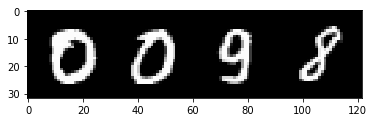

          0           0           9           8


In [2]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# 选择一个 batch 的图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
plt.show()
# 打印 labels
print(' '.join('%11s' % labels[j].numpy() for j in range(4)))

### 定义卷积神经网络

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)        # 1个输入图片通道，6个输出通道，5x5 卷积核
        self.pool = nn.MaxPool2d(2, 2)         # max pooling，2x2
        self.conv2 = nn.Conv2d(6, 16, 5)       # 6个输入图片通道，16个输出通道，5x5 卷积核
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # 拉伸成一维向量，全连接层
        self.fc2 = nn.Linear(120, 84)          # 全连接层 
        self.fc3 = nn.Linear(84, 10)           # 全连接层，输出层 softmax，10个数字
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)    # 拉伸成一维向量
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [4]:
net = Net()
print(net)  

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### 定义损失函数

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

### 训练网络

In [6]:
num_epoches = 5    # 设置 epoch 数目
cost = []     # 损失函数累加

for epoch in range(num_epoches):    
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 输入样本和标签
        inputs, labels = data
        
        # 每次训练梯度清零
        optimizer.zero_grad()
        
        # 正向传播、反向传播和优化过程
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 打印训练情况
        running_loss += loss.item()
        if i % 2000 == 1999:    # 每隔2000 mini-batches，打印一次
            print('[%d, %5d] loss: %.3f' % 
                 (epoch + 1, i + 1, running_loss / 2000))
            cost.append(running_loss / 2000)
            running_loss = 0.0

[1,  2000] loss: 1.038
[1,  4000] loss: 0.364
[1,  6000] loss: 0.261
[1,  8000] loss: 0.225
[1, 10000] loss: 0.182
[1, 12000] loss: 0.170
[1, 14000] loss: 0.146
[2,  2000] loss: 0.122
[2,  4000] loss: 0.118
[2,  6000] loss: 0.102
[2,  8000] loss: 0.108
[2, 10000] loss: 0.103
[2, 12000] loss: 0.092
[2, 14000] loss: 0.085
[3,  2000] loss: 0.089
[3,  4000] loss: 0.082
[3,  6000] loss: 0.078
[3,  8000] loss: 0.068
[3, 10000] loss: 0.059
[3, 12000] loss: 0.064
[3, 14000] loss: 0.067
[4,  2000] loss: 0.058
[4,  4000] loss: 0.063
[4,  6000] loss: 0.055
[4,  8000] loss: 0.059
[4, 10000] loss: 0.057
[4, 12000] loss: 0.055
[4, 14000] loss: 0.052
[5,  2000] loss: 0.044
[5,  4000] loss: 0.046
[5,  6000] loss: 0.053
[5,  8000] loss: 0.044
[5, 10000] loss: 0.048
[5, 12000] loss: 0.046
[5, 14000] loss: 0.049


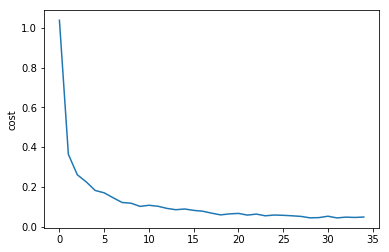

In [8]:
plt.plot(cost)
plt.ylabel('cost')
plt.show()

### 测试数据

In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.3f %%' % 
     (100 * correct / total))

Accuracy of the network on the 10000 test images: 98.900 %
